In [13]:
import pandas

In [14]:
data_path = '/home/shubham/Studies/10-701/hw2' + '/adult.data'

In [15]:
col_names = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race',
            'sex','capital-gain','capital-loss','hours-per-week','native-country','income']
sep = ',\s'
usecols = ''

In [16]:
df = pandas.read_table(data_path,sep = sep,names=col_names)
df = df[~(df == '?').any(axis=1)]

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [17]:
rich_data = df[df['income']=='>50K']
poor_data = df[df['income']=='<=50K']

In [18]:
rich_mean = dict(rich_data.mean(axis=0))
rich_std = dict(rich_data.std(axis=0))
poor_mean = dict(poor_data.mean(axis=0))
poor_std = dict(poor_data.std(axis=0))

In [19]:
poor_education = dict(poor_data['education'].value_counts())
poor_country = dict(poor_data['native-country'].value_counts())
poor_occupation = dict(poor_data['occupation'].value_counts())
poor_relationship = dict(poor_data['relationship'].value_counts())
poor_marital = dict(poor_data['marital-status'].value_counts())
poor_race = dict(poor_data['race'].value_counts())
poor_sex = dict(poor_data['sex'].value_counts())
poor_workclass = dict(poor_data['workclass'].value_counts())
poor_dict = {'education':poor_education,'native-country':poor_country,'occupation':poor_occupation,'sex':poor_sex,
          'race':poor_race,'workclass':poor_workclass,'relationship':poor_relationship,'marital-status':poor_marital}

rich_education = dict(rich_data['education'].value_counts())
rich_country = dict(rich_data['native-country'].value_counts())
rich_occupation = dict(rich_data['occupation'].value_counts())
rich_relationship = dict(rich_data['relationship'].value_counts())
rich_marital = dict(rich_data['marital-status'].value_counts())
rich_race = dict(rich_data['race'].value_counts())
rich_sex = dict(rich_data['sex'].value_counts())
rich_workclass = dict(rich_data['workclass'].value_counts())
rich_dict = {'education':rich_education,'native-country':rich_country,'occupation':rich_occupation,'sex':rich_sex,
          'race':rich_race,'workclass':rich_workclass,'relationship':rich_relationship,'marital-status':rich_marital}

In [25]:
rich_count = rich_data.shape[0]
poor_count = poor_data.shape[0]
total_count   = rich_count+poor_count
def print_alphas(d,den,keys):
    output = ""
    for key in keys:
        if key in d:
            output+=key + "="+ "%.4f"%(d[key]/den) +" , "
    return output

In [26]:
print("Prior probability of y, P(y)\n")
print(" P(y = '>50K'):",rich_count/total_count)
print(" P(y = '<=50K'):",poor_count/total_count)

Prior probability of y, P(y)

 P(y = '>50K'): 0.24892248524633645
 P(y = '<=50K'): 0.7510775147536636


In [22]:
print(rich_workclass)

{'Self-emp-not-inc': 714, 'State-gov': 344, 'Self-emp-inc': 600, 'Federal-gov': 365, 'Private': 4876, 'Local-gov': 609}


In [28]:
workclass_order = [ 'Private','Self-emp-not-inc', 'Self-emp-inc', 'Federal-gov', 'Local-gov', 'State-gov', 'Without-pay', 
                   'Never-worked']
education_order = ['Bachelors', 'Some-college', '11th', 'HS-grad', 'Prof-school', 'Assoc-acdm', 'Assoc-voc',
                   '9th', '7th-8th', '12th', 'Masters', '1st-4th', '10th', 'Doctorate', '5th-6th', 'Preschool']
marital_order = ['Married-civ-spouse', 'Divorced', 'Never-married', 'Separated',
                 'Widowed', 'Married-spouse-absent', 'Married-AF-spouse' ]
occupation_order = ['Tech-support', 'Craft-repair', 'Other-service', 'Sales',
                    'Exec-managerial', 'Prof-specialty', 'Handlers-cleaners', 'Machine-op-inspct',
                    'Adm-clerical', 'Farming-fishing', 'Transport-moving', 'Priv-house-serv',
                    'Protective-serv', 'Armed-Forces']
relationship_order = ['Wife', 'Own-child', 'Husband', 'Not-in-family', 'Other-relative', 'Unmarried']

race_order = ['White', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other', 'Black']
sex_order = ['Female','Male']

country_order = ['United-States', 'Cambodia', 'England', 'Puerto-Rico', 'Canada', 'Germany',
                 'Outlying-US(Guam-USVI-etc)', 'India', 'Japan', 'Greece', 'South', 'China',
                 'Cuba', 'Iran', 'Honduras', 'Philippines', 'Italy', 'Poland',
                 'Jamaica', 'Vietnam', 'Mexico', 'Portugal', 'Ireland', 'France',
                 'Dominican-Republic', 'Laos', 'Ecuador', 'Taiwan', 'Haiti', 'Columbia', 'Hungary', 'Guatemala',
                 'Nicaragua', 'Scotland', 'Thailand', 'Yugoslavia', 'El-Salvador',
                 'Trinadad&Tobago', 'Peru', 'Hong', 'Holand-Netherlands']


print("Class > 50K\n")
print("age: mean=",rich_mean['age']," , std-dev=" ,rich_std['age'])
print("workclass: ", print_alphas(rich_workclass,rich_count,workclass_order))
print("fnlgwt: mean=",rich_mean['fnlwgt']," , std-dev=" ,rich_std['fnlwgt'])
print("education: ", print_alphas(rich_education,rich_count,education_order))
print("education-num: mean=",rich_mean['education-num']," , std-dev=" ,rich_std['education-num'])
print("marital-status: ", print_alphas(rich_marital,rich_count,marital_order))
print("occupation: ", print_alphas(rich_occupation,rich_count,occupation_order))
print("relationship: ", print_alphas(rich_relationship,rich_count,relationship_order))
print("race: ", print_alphas(rich_race,rich_count,race_order))
print("sex: ", print_alphas(rich_sex,rich_count,sex_order))
print("capital-gain: mean=",rich_mean['capital-gain']," , std-dev=" ,rich_std['capital-gain'])
print("capital-loss: mean=",rich_mean['capital-loss']," , std-dev=" ,rich_std['capital-loss'])
print("hours-per-week: mean=",rich_mean['hours-per-week']," , std-dev=" ,rich_std['hours-per-week'])
print("country: ", print_alphas(rich_country,rich_count,country_order))

print("\n\n")
print("Class <= 50K\n")
print("age: mean=",poor_mean['age']," , std-dev=" ,poor_std['age'])
print("workclass: ", print_alphas(poor_workclass,poor_count,workclass_order))
print("fnlgwt: mean=",poor_mean['fnlwgt']," , std-dev=" ,poor_std['fnlwgt'])
print("education: ", print_alphas(poor_education,poor_count,education_order))
print("education-num: mean=",poor_mean['education-num']," , std-dev=" ,poor_std['education-num'])
print("marital-status: ", print_alphas(poor_marital,poor_count,marital_order))
print("occupation: ", print_alphas(poor_occupation,poor_count,occupation_order))
print("relationship: ", print_alphas(poor_relationship,poor_count,relationship_order))
print("race: ", print_alphas(poor_race,poor_count,race_order))
print("sex: ", print_alphas(poor_sex,poor_count,sex_order))
print("capital-gain: mean=",poor_mean['capital-gain']," , std-dev=" ,poor_std['capital-gain'])
print("capital-loss: mean=",poor_mean['capital-loss']," , std-dev=" ,poor_std['capital-loss'])
print("hours-per-week: mean=",poor_mean['hours-per-week']," , std-dev=" ,poor_std['hours-per-week'])
print("country: ", print_alphas(poor_country,poor_count,country_order))

Class > 50K

age: mean= 43.9591102824  , std-dev= 10.2696328357
workclass:  Private=0.6494 , Self-emp-not-inc=0.0951 , Self-emp-inc=0.0799 , Federal-gov=0.0486 , Local-gov=0.0811 , State-gov=0.0458 , 
fnlgwt: mean= 188149.962174  , std-dev= 102821.737114
education:  Bachelors=0.2832 , Some-college=0.1779 , 11th=0.0079 , HS-grad=0.2154 , Prof-school=0.0541 , Assoc-acdm=0.0341 , Assoc-voc=0.0458 , 9th=0.0033 , 7th-8th=0.0047 , 12th=0.0039 , Masters=0.1223 , 1st-4th=0.0008 , 10th=0.0079 , Doctorate=0.0373 , 5th-6th=0.0016 , 
education-num: mean= 11.6064198189  , std-dev= 2.36842295136
marital-status:  Married-civ-spouse=0.8523 , Divorced=0.0602 , Never-married=0.0626 , Separated=0.0088 , Widowed=0.0107 , Married-spouse-absent=0.0041 , Married-AF-spouse=0.0013 , 
occupation:  Tech-support=0.0370 , Craft-repair=0.1209 , Other-service=0.0176 , Sales=0.1292 , Exec-managerial=0.2580 , Prof-specialty=0.2412 , Handlers-cleaners=0.0111 , Machine-op-inspct=0.0326 , Adm-clerical=0.0663 , Farming-fi

In [60]:
dict(rich_data.iloc[2])
import math
discrete = [k for k in rich_dict]

def norm_prob(x,mean,var):
    eps = 1e-9
    num = -((x - mean)**2) / (2*(var+eps))
    p = math.e**num
    p = p/ math.sqrt(2*math.pi*(var+eps))
    return p
    
def log_posteriors(d):
    log_p = [0,0]
    p =0
    
    prior = rich_count/total_count
    p +=math.log(prior)
    for key,value in d.items():
            if(key=='income'):
                continue
        
            if key in discrete:
                try:
                    alpha = rich_dict[key][value] / rich_count
                    p+=math.log(alpha)
                except:
                    p+= -100
            else:
                try:
                
                    p+=math.log(norm_prob(value,rich_mean[key],rich_std[key]**2))
                except:
                    print("error in rich",key)
    log_p[1] = p
    prior = poor_count/total_count
    p =math.log(prior)
    for key,value in d.items():
            if(key=='income'):
                continue
        
            if key in discrete:
                try:
                    alpha = poor_dict[key][value] / poor_count
                    p+=math.log(alpha)
                except:
                    p+=-100
            else:
                try:
                
                    p+=math.log(norm_prob(value,poor_mean[key],poor_std[key]**2))
                except:
                    print("error in poor",key)
    log_p[0] = p
                

    return log_p
    
    

In [30]:
log_posteriors(dict(rich_data.iloc[2]))

[-59.209000378273174, -44.20926554183373]

In [31]:
test_path = '/home/shubham/Studies/10-701/hw2' + '/adult.test'
tf = pandas.read_table(test_path,sep = sep,names=col_names,skiprows=[0])

tf = tf[~(tf == '?').any(axis=1)]
tf.iloc[0]
# log_posteriors(dict(tf.iloc[1]))
# log_posteriors(dict(tf.iloc[2]))
# log_posteriors(dict(tf.iloc[3]))

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


age                              25
workclass                   Private
fnlwgt                       226802
education                      11th
education-num                     7
marital-status        Never-married
occupation        Machine-op-inspct
relationship              Own-child
race                          Black
sex                            Male
capital-gain                      0
capital-loss                      0
hours-per-week                   40
native-country        United-States
income                       <=50K.
Name: 0, dtype: object

In [32]:
print(log_posteriors(dict(tf.iloc[0])))
print(log_posteriors(dict(tf.iloc[1])))
print(log_posteriors(dict(tf.iloc[2])))
log_posteriors(dict(tf.iloc[3]))

[-48.281503225183, -63.35555848880769]
[-44.40062721907764, -48.28030515045233]
[-50.72583352277821, -52.70005667071183]


[-77.92802077659819, -49.735882065456174]

In [57]:
import re
def classify(tf):
    correct = 0
    count = tf.shape[0]
    for i in range(count):
        if(i%100 ==0):
            print(i,correct)
        d = dict(tf.iloc[i])
        l=[10,0]
#         try:
        l = log_posteriors(d)
#         except:
#             print("Error at index:",i)
            
        if(l[0] > l[1]):
            pred = '<=50K.'
        else:
            pred = '>50K.'
        if(re.match(d['income'],pred)):
            correct+=1
#             print(i,": correct")
        else:
            pass
#             print(d['income'], ' guessed: ',pred)
    return correct,correct/count
            
            

In [41]:
d = dict(tf.iloc[3])
d['income']
classify(tf)

0 0
10 9
20 18
30 28
40 37
50 46
60 56
70 66
80 74
90 83
100 93
110 101
120 110
130 118
140 127
150 137
160 146
170 153
180 162
190 167
200 174
210 183
220 190
230 198
240 205
250 212
260 220
270 228
280 235
290 242
300 248
310 256
error in poor capital-gain
320 263
error in poor capital-gain
330 269
340 277
350 284
360 292
370 299
380 307
error in poor capital-gain
390 315
400 321
410 330
420 339
430 348
440 356
450 366
460 376
470 383
480 391
490 400
500 408
510 415
520 423
530 431
540 439
550 445
560 452
570 462
580 471
590 481
600 490
610 499
620 507
630 516
error in poor capital-gain
640 523
error in poor capital-gain
650 530
660 534
670 543
680 551
690 559
700 566
710 573
Error at index: 717
720 581
730 587
740 594
750 602
Error at index: 754
760 610
770 619
780 629
790 636
800 645
810 651
error in poor capital-gain
820 658
830 664
840 673
850 679
860 689
870 696
880 705
890 714
900 722
910 730
error in poor capital-gain
920 735
930 745
940 755
950 765
960 773
970 781
Error at in

7830 6399
7840 6409
7850 6415
7860 6424
7870 6432
7880 6439
7890 6449
7900 6457
7910 6466
7920 6475
7930 6484
7940 6491
7950 6500
7960 6506
7970 6513
7980 6523
7990 6531
8000 6540
error in poor capital-gain
8010 6547
8020 6555
8030 6564
8040 6571
8050 6578
8060 6587
8070 6594
8080 6603
8090 6612
8100 6622
8110 6631
Error at index: 8113
8120 6637
8130 6647
8140 6655
8150 6665
8160 6673
8170 6682
8180 6692
8190 6700
8200 6708
8210 6716
8220 6724
8230 6734
Error at index: 8231
8240 6743
8250 6751
8260 6759
8270 6766
8280 6774
8290 6779
8300 6789
8310 6797
error in poor capital-gain
8320 6805
8330 6813
8340 6822
8350 6830
8360 6837
8370 6846
8380 6853
8390 6861
8400 6870
8410 6879
8420 6886
8430 6894
8440 6901
8450 6909
8460 6918
8470 6926
8480 6935
8490 6943
8500 6948
8510 6957
8520 6965
8530 6973
8540 6981
8550 6991
8560 6999
8570 7007
error in poor capital-gain
8580 7015
8590 7025
8600 7033
8610 7042
8620 7051
8630 7059
8640 7066
8650 7075
8660 7084
8670 7093
8680 7101
8690 7107
8700 71

(12325, 0.8183930942895087)

In [43]:
classify(df)

0 0
100 83
200 164
Error at index: 208
300 246
400 331
500 416
600 502
700 579
800 657
Error at index: 857
900 741
1000 821
1100 899
error in poor capital-gain
1200 978
error in poor capital-gain
1300 1054
error in poor capital-gain
1400 1127
error in poor capital-gain
Error at index: 1439
error in poor capital-gain
1500 1210
error in poor capital-gain
1600 1295
error in poor capital-gain
error in poor capital-gain
error in poor capital-gain
1700 1378
Error at index: 1748
1800 1456
1900 1538
error in poor capital-gain
2000 1622
2100 1701
error in poor capital-gain
error in poor capital-gain
2200 1783
2300 1871
2400 1948
error in poor capital-gain
2500 2029
2600 2113
Error at index: 2648
2700 2195
Error at index: 2705
2800 2273
error in poor capital-gain
2900 2357
error in poor capital-gain
3000 2431
error in poor capital-gain
3100 2515
Error at index: 3166
3200 2593
3300 2676
3400 2760
3500 2843
error in poor capital-gain
3600 2921
3700 2997
Error at index: 3767
3800 3081
Error at inde

(24804, 0.8223592599960214)

In [61]:
n = [2**i for i in range(5,14)]
train_accuracies= []
test_accuracies= []
for j in n:
    df = pandas.read_table(data_path,sep = sep,names=col_names,nrows = j)
    df = df[~(df == '?').any(axis=1)]
    
    #remove ?
    rich_data = df[df['income']=='>50K']
    poor_data = df[df['income']=='<=50K']

    rich_mean = dict(rich_data.mean(axis=0))
    rich_std = dict(rich_data.std(axis=0))
    poor_mean = dict(poor_data.mean(axis=0))
    poor_std = dict(poor_data.std(axis=0))

    poor_education = dict(poor_data['education'].value_counts())
    poor_country = dict(poor_data['native-country'].value_counts())
    poor_occupation = dict(poor_data['occupation'].value_counts())
    poor_relationship = dict(poor_data['relationship'].value_counts())
    poor_marital = dict(poor_data['marital-status'].value_counts())
    poor_race = dict(poor_data['race'].value_counts())
    poor_sex = dict(poor_data['sex'].value_counts())
    poor_workclass = dict(poor_data['workclass'].value_counts())
    poor_dict = {'education':poor_education,'native-country':poor_country,'occupation':poor_occupation,'sex':poor_sex,
          'race':poor_race,'workclass':poor_workclass,'relationship':poor_relationship,'marital-status':poor_marital}

    rich_education = dict(rich_data['education'].value_counts())
    rich_country = dict(rich_data['native-country'].value_counts())
    rich_occupation = dict(rich_data['occupation'].value_counts())
    rich_relationship = dict(rich_data['relationship'].value_counts())
    rich_marital = dict(rich_data['marital-status'].value_counts())
    rich_race = dict(rich_data['race'].value_counts())
    rich_sex = dict(rich_data['sex'].value_counts())
    rich_workclass = dict(rich_data['workclass'].value_counts())
    rich_dict = {'education':rich_education,'native-country':rich_country,'occupation':rich_occupation,'sex':rich_sex,
          'race':rich_race,'workclass':rich_workclass,'relationship':rich_relationship,'marital-status':rich_marital}
    #split rcih poor
    
    #copy rich poor dict defs
    correct,acc = classify(tf)
    test_accuracies.append(acc)
    correct,acc = classify(df)
    train_accuracies.append(acc)



/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """


0 0
error in rich capital-loss
error in rich capital-loss
100 82
error in rich capital-loss
error in rich capital-loss
error in rich capital-loss
error in rich capital-loss
error in rich capital-loss
error in rich capital-loss
error in rich capital-loss
200 153
error in rich capital-loss
error in rich capital-loss
error in rich capital-loss
error in poor capital-gain
error in rich capital-loss
error in rich capital-loss
300 219
error in rich capital-loss
error in poor capital-gain
error in poor capital-gain
error in rich capital-loss
error in rich capital-loss
error in rich capital-loss
error in poor capital-gain
400 288
error in rich capital-loss
error in rich capital-loss
error in poor capital-gain
error in rich capital-loss
500 361
error in rich capital-loss
error in rich capital-loss
error in rich capital-loss
error in rich capital-loss
600 442
error in rich capital-loss
error in rich capital-loss
error in poor capital-gain
error in poor capital-gain
error in rich capital-loss
erro

6500 4807
error in rich capital-loss
error in rich capital-loss
error in rich capital-loss
error in rich capital-loss
error in rich capital-loss
6600 4880
error in rich capital-loss
error in rich capital-loss
error in rich capital-loss
6700 4959
error in rich capital-loss
error in rich capital-loss
error in rich capital-loss
error in rich capital-loss
error in rich capital-loss
error in poor capital-gain
6800 5035
error in poor capital-gain
error in rich capital-loss
error in rich capital-loss
error in rich capital-loss
error in rich capital-loss
error in rich capital-loss
error in rich capital-loss
error in rich capital-loss
error in rich capital-loss
error in poor capital-gain
error in rich capital-loss
6900 5107
error in rich capital-loss
error in poor capital-gain
error in rich capital-loss
error in rich capital-loss
error in poor capital-gain
error in poor capital-gain
7000 5179
error in rich capital-loss
error in rich capital-loss
error in rich capital-loss
7100 5250
7200 5328
er

2100 1675
2200 1752
error in poor capital-gain
2300 1833
2400 1912
2500 1990
error in poor capital-gain
2600 2065
2700 2141
error in poor capital-gain
2800 2220
2900 2305
error in poor capital-gain
3000 2389
error in poor capital-gain
3100 2466
3200 2546
3300 2625
error in poor capital-gain
3400 2704
3500 2787
3600 2868
error in poor capital-gain
error in poor capital-gain
3700 2945
3800 3025
3900 3114
4000 3192
error in poor capital-gain
4100 3276
4200 3355
error in poor capital-gain
4300 3435
error in poor capital-gain
4400 3525
error in poor capital-gain
4500 3597
4600 3673
error in poor capital-gain
error in poor capital-gain
4700 3744
4800 3818
error in poor capital-gain
4900 3895
5000 3975
error in poor capital-gain
error in poor capital-gain
5100 4052
5200 4132
error in poor capital-gain
5300 4214
error in poor capital-gain
5400 4291
5500 4370
5600 4455
error in poor capital-gain
5700 4530
5800 4617
error in poor capital-gain
error in poor capital-gain
5900 4695
error in poor ca

0 0
100 85
200 169
0 0
100 93
200 174
error in poor capital-gain
300 245
error in poor capital-gain
error in poor capital-gain
error in poor capital-gain
400 317
error in poor capital-gain
500 402
600 484
error in poor capital-gain
error in poor capital-gain
700 557
800 638
error in poor capital-gain
900 716
error in poor capital-gain
error in poor capital-gain
error in poor capital-gain
1000 797
error in poor capital-gain
error in poor capital-gain
error in poor capital-gain
1100 872
error in poor capital-gain
error in poor capital-gain
1200 951
error in poor capital-gain
1300 1033
1400 1110
1500 1197
1600 1274
error in poor capital-gain
1700 1357
error in poor capital-gain
1800 1440
1900 1525
error in poor capital-gain
2000 1604
error in poor capital-gain
2100 1690
2200 1770
error in poor capital-gain
2300 1848
2400 1928
2500 2010
error in poor capital-gain
2600 2093
2700 2170
error in poor capital-gain
2800 2252
2900 2335
error in poor capital-gain
3000 2418
error in poor capital-ga

error in poor capital-gain
2100 1705
2200 1784
error in poor capital-gain
2300 1862
2400 1944
2500 2026
error in poor capital-gain
2600 2109
2700 2185
error in poor capital-gain
2800 2265
2900 2350
error in poor capital-gain
3000 2432
error in poor capital-gain
3100 2514
3200 2595
3300 2679
error in poor capital-gain
error in poor capital-gain
3400 2756
3500 2837
3600 2921
error in poor capital-gain
error in poor capital-gain
3700 3005
3800 3084
3900 3175
4000 3260
error in poor capital-gain
4100 3346
4200 3427
error in poor capital-gain
4300 3511
error in poor capital-gain
4400 3600
error in poor capital-gain
4500 3676
4600 3758
error in poor capital-gain
error in poor capital-gain
4700 3832
error in poor capital-gain
4800 3906
error in poor capital-gain
4900 3985
5000 4069
error in poor capital-gain
error in poor capital-gain
5100 4149
5200 4230
error in poor capital-gain
5300 4312
error in poor capital-gain
5400 4395
5500 4482
error in poor capital-gain
error in poor capital-gain
56

error in poor capital-gain
2500 2041
2600 2125
2700 2205
2800 2283
error in poor capital-gain
2900 2366
error in poor capital-gain
3000 2443
error in poor capital-gain
3100 2528
3200 2609
3300 2690
3400 2775
3500 2858
error in poor capital-gain
3600 2936
3700 3012
0 0
100 92
200 173
300 247
error in poor capital-gain
error in poor capital-gain
error in poor capital-gain
400 319
500 408
600 490
error in poor capital-gain
error in poor capital-gain
700 568
800 647
error in poor capital-gain
900 724
error in poor capital-gain
1000 809
error in poor capital-gain
error in poor capital-gain
error in poor capital-gain
1100 889
error in poor capital-gain
1200 971
error in poor capital-gain
1300 1055
1400 1132
1500 1221
1600 1298
error in poor capital-gain
1700 1385
error in poor capital-gain
1800 1473
1900 1556
error in poor capital-gain
2000 1638
error in poor capital-gain
2100 1723
2200 1803
error in poor capital-gain
2300 1884
2400 1966
2500 2048
error in poor capital-gain
2600 2129
2700 22

[74.03054448871183, 79.6547144754316, 81.01593625498008, 81.92563081009297, 80.99601593625498, 81.68658698539176, 81.54050464807437, 82.11819389110225, 82.24435590969456]
[90.0, 93.22033898305084, 87.39495798319328, 85.59322033898306, 85.59322033898306, 84.23280423280424, 80.75291622481441, 81.41640042598509, 82.41758241758241]


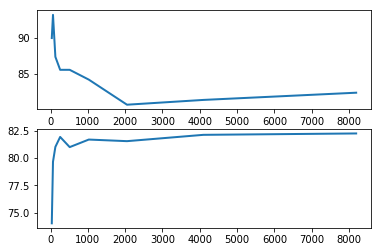

In [70]:
test_acc = [100*t for t in test_accuracies]
train_acc = [100*t for t in train_accuracies]
print(test_acc)
print(train_acc)
import matplotlib.pyplot as plt
plt.figure(1)
plt.subplot(211)
plt.plot(n, train_acc, linewidth=2.0)

plt.subplot(212)
plt.plot(n,test_acc,linewidth=2.0)
plt.show()

